# Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

https://www.movebank.org/cms/webapp?dies,path=study1605024900

https://www.movebank.org/cms/webapp?gwt_fragment=page=studies,path=study1605024900

In [ ]:
path = '/content/drive/MyDrive/QMUL/Sem 2/Machine Learning/project2/Datasets/Forest_Park_Living_Lab.csv'#colab
#path = 'G:/My Drive/QMUL/Sem 2/Machine Learning/project2/Datasets/Forest_Park_Living_Lab.csv'

df_raw_data = pd.read_csv(path)
df_raw_data['timestamp'] = pd.to_datetime(df_raw_data['timestamp'])

print(len(df_raw_data))

#print(df)

856662


# Data Exploring

In [ ]:
print(df_raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856662 entries, 0 to 856661
Data columns (total 53 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   event-id                                       856662 non-null  int64         
 1   visible                                        856662 non-null  bool          
 2   timestamp                                      856662 non-null  datetime64[ns]
 3   location-long                                  41154 non-null   float64       
 4   location-lat                                   41154 non-null   float64       
 5   gps:activity-count                             7330 non-null    float64       
 6   bar:barometric-pressure                        32363 non-null   float64       
 7   ctt:solar-current-since-last-fix               7330 non-null    float64       
 8   data-decoding-software                      

split them into 20 time stamp series

use rnn to classify by animal

x is animal
the rest is latitude whatever spaced by 20 timestamps

kinda like the splitting the word thing

# Exploring different animals

In [ ]:
print(df_raw_data['individual-taxon-canonical-name'].unique())

['Procyon lotor' 'Bubo virginianus' 'Anas platyrhynchos'
 'Buteo jamaicensis' 'Branta canadensis' 'Strix varia'
 'Meleagris gallopavo' 'Chelydra serpentina']


In [ ]:
df_raw_data = df_raw_data.dropna(subset=['location-long', 'location-lat'])

In [ ]:
df = df_raw_data[df_raw_data["individual-taxon-canonical-name"]=='Procyon lotor']

In [ ]:
classes = df['individual-local-identifier'].unique()
colors = plt.cm.tab10(range(len(classes)))

# Create a dictionary mapping each class to a color
color_map = {cls: colors[i] for i, cls in enumerate(classes)}

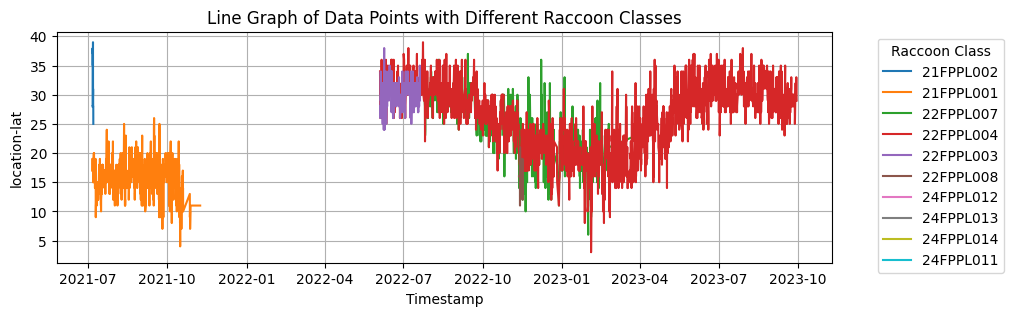

In [ ]:

# Plot the line graph with each class represented by a different color
plt.figure(figsize=(10, 3))
for cls, color in color_map.items():
    df_class = df[df['individual-local-identifier'] == cls]
    plt.plot(df_class['timestamp'], df_class['eobs:temperature'], color=color, label=cls)

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('location-lat')
plt.title('Line Graph of Data Points with Different Raccoon Classes')
plt.legend(title='Raccoon Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Chosen animals tags as they have the longest recorded time series of that particular animal.

*   procyon lotor - 22FPPL004
*   bubo virgiuanus - 21FPBV001
*   Anas platyrhynchos - 23FPAP002
*   Buteo jamaicensis - 23FPBJ001
*   Branta canadensis - 23FPBC002
*   Strix varia -23FPSV001 (time series kinda broken up)
*   Meleagris gallopavo - 24FPMG001
*   Chelydra serpentina - 21FPCS003(not much movement)



# Raccoons Exploration

In [ ]:
df_raccoons = df_raw_data[df_raw_data["individual-local-identifier"]=='22FPPL004']
df_raccoons = df_raccoons.dropna(subset=['location-long', 'location-lat'])
#print(df_raccoons)
print(len(df_raccoons))

2387


In [ ]:
df_racoons = df_raccoons[(df_raccoons['timestamp'] >= '2022-01-01') & (df_raccoons['timestamp'] <= '2024-01-01')]

# Print the filtered DataFrame
print(len(df))
print(df['tag-local-identifier'].unique())
#print(df['gps:activity-count'].unique)
print('\n' , df['individual-local-identifier'].unique())

6810
[ 8374  8373 10307 10309 10308 10310 46016 46009 46013 46014]

 ['21FPPL002' '21FPPL001' '22FPPL007' '22FPPL004' '22FPPL003' '22FPPL008'
 '24FPPL012' '24FPPL013' '24FPPL014' '24FPPL011']


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 13221 to 19833
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   event-id                                       1173 non-null   int64         
 1   visible                                        1173 non-null   bool          
 2   timestamp                                      1173 non-null   datetime64[ns]
 3   location-long                                  1173 non-null   float64       
 4   location-lat                                   1173 non-null   float64       
 5   gps:activity-count                             0 non-null      float64       
 6   bar:barometric-pressure                        1173 non-null   float64       
 7   ctt:solar-current-since-last-fix               0 non-null      float64       
 8   data-decoding-software                         1173 n

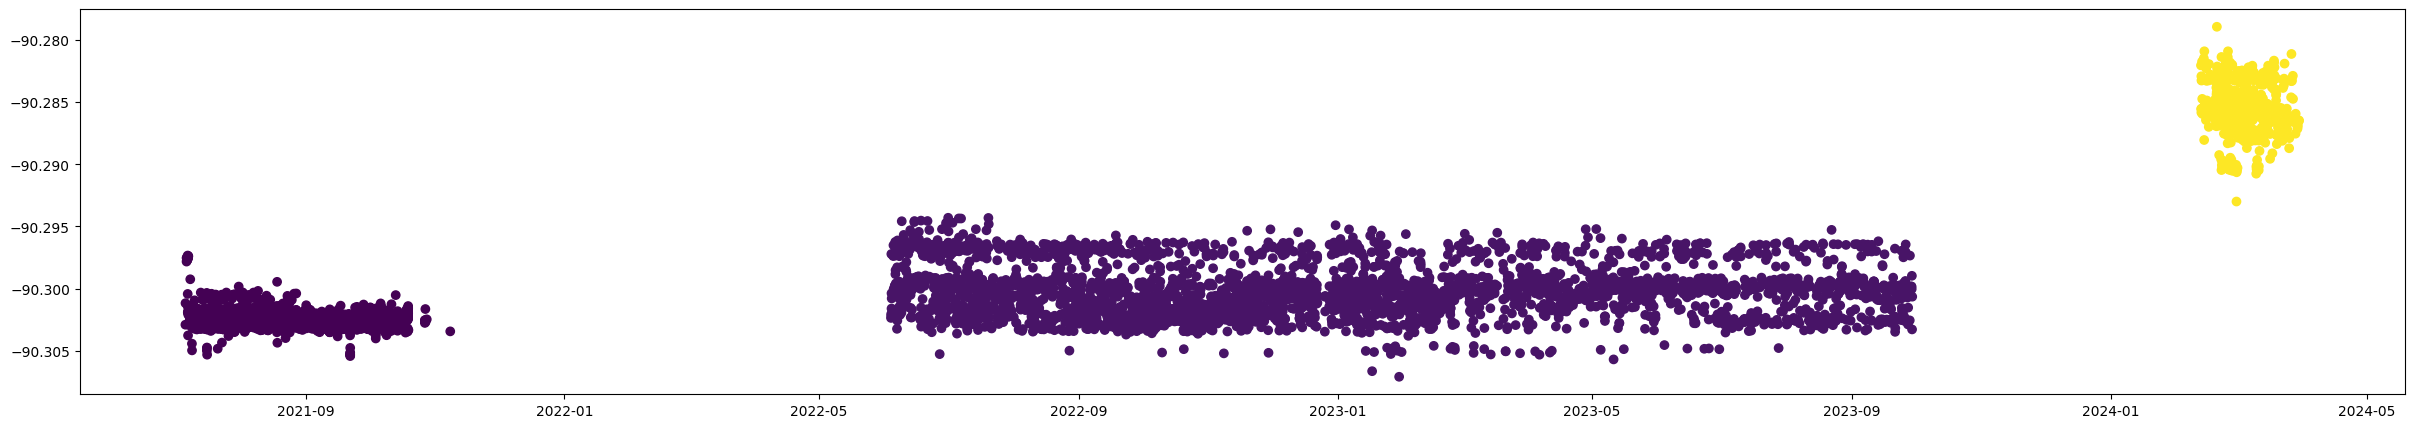

In [ ]:
plt.figure(figsize=(30,5))
plt.scatter(df['timestamp'],df['location-long'], c=df['tag-local-identifier'])
plt.show()

In [ ]:
classes = df['individual-local-identifier'].unique()
colors = plt.cm.tab10(range(len(classes)))

# Create a dictionary mapping each class to a color
color_map = {cls: colors[i] for i, cls in enumerate(classes)}

Temperature Time Series

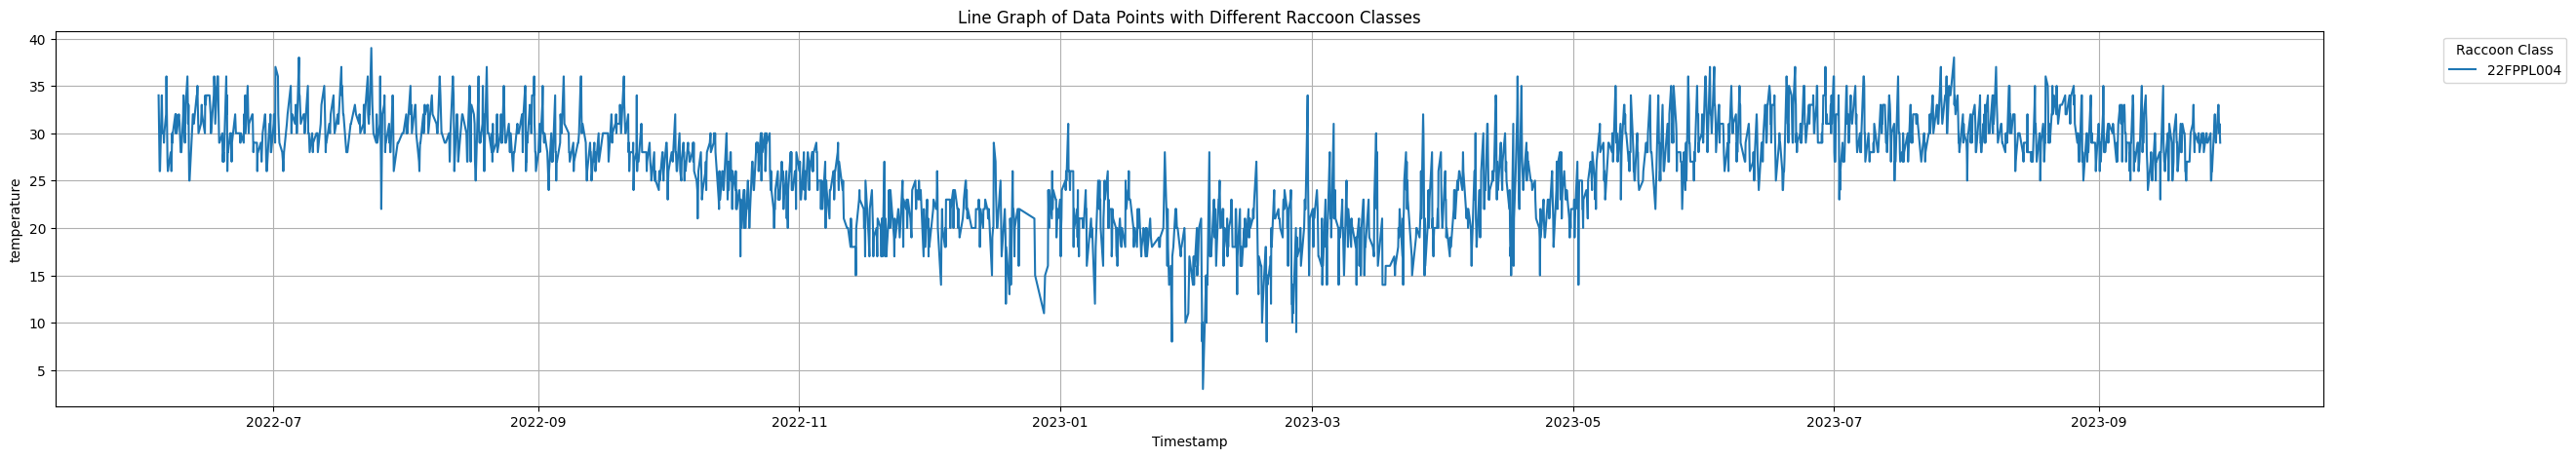

In [ ]:
# Plot the line graph with each class represented by a different color
plt.figure(figsize=(30, 5))
for cls, color in color_map.items():
    df_class = df[df['individual-local-identifier'] == cls]
    plt.plot(df_class['timestamp'], df_class['eobs:temperature'], color=color, label=cls)

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('temperature')
plt.title('Line Graph of Data Points with Different Raccoon Classes')
plt.legend(title='Raccoon Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Location Latitude Time Series

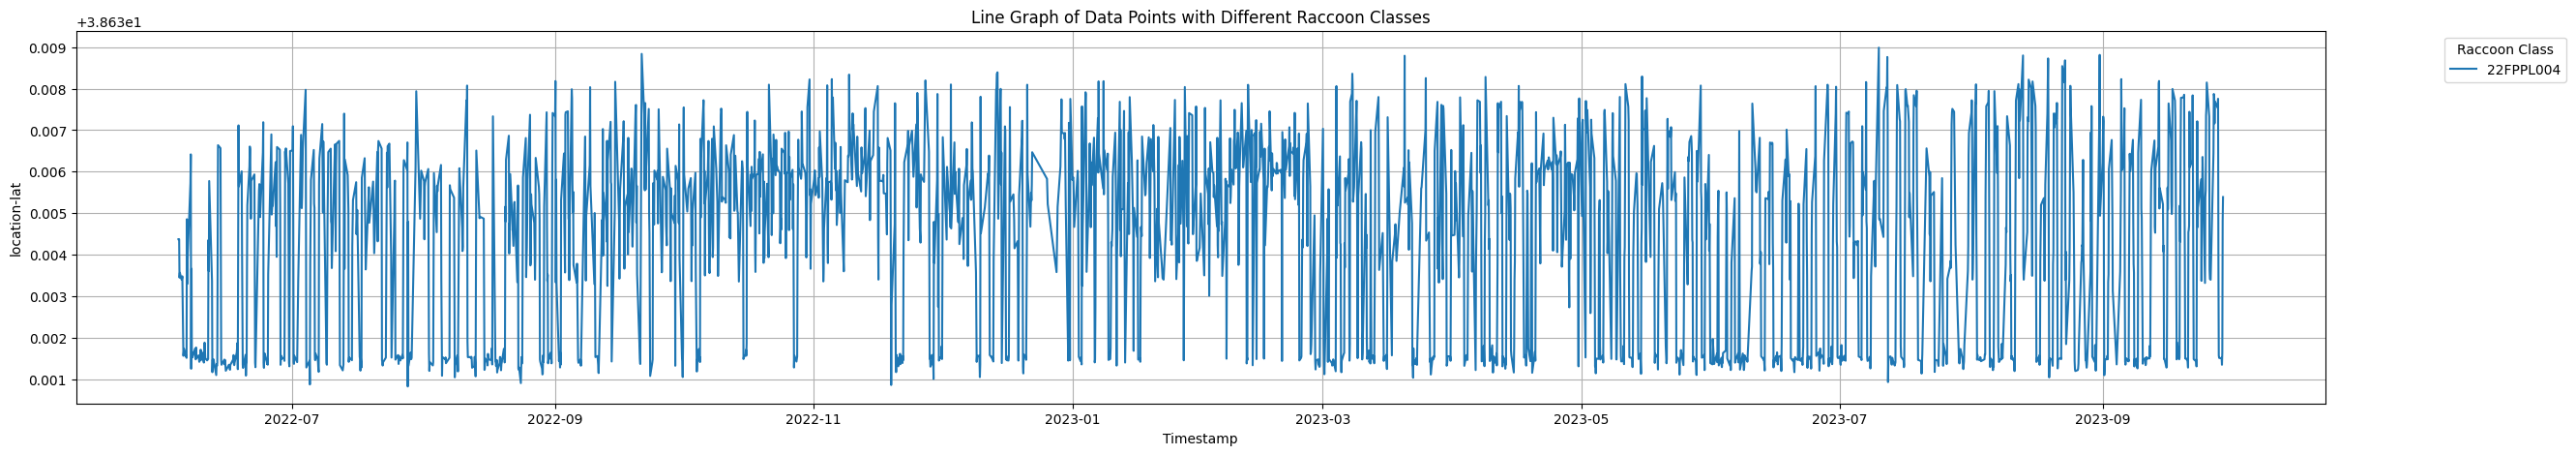

In [ ]:
# Plot the line graph with each class represented by a different color
plt.figure(figsize=(30, 5))
for cls, color in color_map.items():
    df_class = df[df['individual-local-identifier'] == cls]
    plt.plot(df_class['timestamp'], df_class['location-lat'], color=color, label=cls)

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('location-lat')
plt.title('Line Graph of Data Points with Different Raccoon Classes')
plt.legend(title='Raccoon Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
print(len(df))

2387


# data prep for time series

In [ ]:
df_raccoons = df_raw_data[df_raw_data["individual-local-identifier"]=='22FPPL004']
df_raccoons = df_raccoons.dropna(subset=['location-long', 'location-lat'])
df_racoons = df_raccoons[(df_raccoons['timestamp'] >= '2022-01-01') & (df_raccoons['timestamp'] <= '2024-01-01')]
#print(df_raccoons)
print(len(df_raccoons))

2387


In [ ]:
df_r = pd.DataFrame()

df_r['timestamp'] = df_raccoons['timestamp']
df_r['temperature'] = df_raccoons['eobs:temperature']

print(df_r.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2387 entries, 15592 to 19457
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    2387 non-null   datetime64[ns]
 1   temperature  2387 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 55.9 KB
None


                timestamp  temperature
15592 2022-06-04 04:00:51         34.0
15594 2022-06-04 08:01:00         29.0
15595 2022-06-04 10:00:53         26.0
15596 2022-06-04 12:00:18         26.0
15597 2022-06-04 22:00:53         34.0
...                   ...          ...
19453 2023-09-29 00:02:32         32.0
19454 2023-09-29 02:02:33         30.0
19455 2023-09-29 04:02:32         31.0
19456 2023-09-29 06:02:32         30.0
19457 2023-09-29 08:02:32         29.0

[2387 rows x 2 columns]


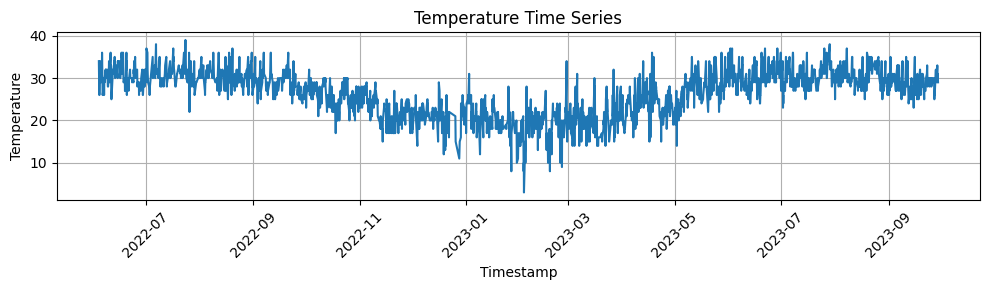

In [ ]:
print(df_r)

# Convert 'timestamp' and 'temperature' columns to NumPy arrays
timestamp = np.array(df_r['timestamp'])
temperature = np.array(df_r['temperature'])

# Plot the data
plt.figure(figsize=(10, 3))
plt.plot(timestamp, temperature)
plt.title('Temperature Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

interpolate

In [ ]:
#linearly interpolate the data while rounding the hours down by flooring it

# Store the original temperature values
original_temperature = df_r['temperature']

# Floor the timestamp to the nearest hour
df_r['timestamp'] = df_r['timestamp'].dt.floor('H')

# Restore the original temperature values
df_r['temperature'] = original_temperature

# Resample the DataFrame to 2-hour intervals and interpolate missing values
df_r_interpolated = df_r.set_index('timestamp').resample('2H').interpolate(method='linear').reset_index()

               timestamp  temperature
0    2022-06-04 04:00:00         34.0
1    2022-06-04 06:00:00         31.5
2    2022-06-04 08:00:00         29.0
3    2022-06-04 10:00:00         26.0
4    2022-06-04 12:00:00         26.0
...                  ...          ...
5782 2023-09-29 00:00:00         32.0
5783 2023-09-29 02:00:00         30.0
5784 2023-09-29 04:00:00         31.0
5785 2023-09-29 06:00:00         30.0
5786 2023-09-29 08:00:00         29.0

[5787 rows x 2 columns]


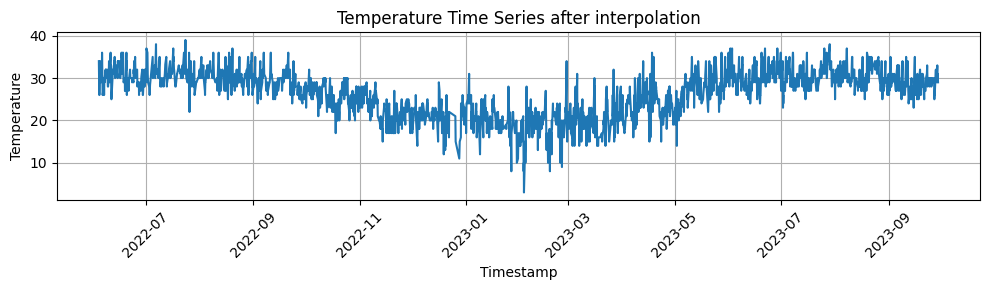

In [ ]:
print(df_r_interpolated)

timestamp = np.array(df_r_interpolated['timestamp'])
temperature = np.array(df_r_interpolated['temperature'])

# Plot the data
plt.figure(figsize=(10, 3))
plt.plot(timestamp, temperature)
plt.title('Temperature Time Series after interpolation')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

normalise data

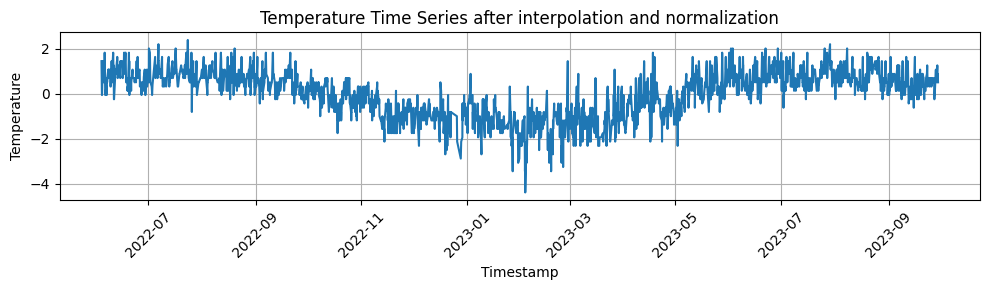

In [ ]:
# Initialize the MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Extract the 'temperature' column and reshape it to a 2D array
temperature_data = df_r_interpolated['temperature'].values.reshape(-1, 1)

# Normalize the 'temperature' column
df_r_interpolated['temperature_normalized'] = scaler.fit_transform(temperature_data)

df_r_norm = df_r_interpolated



timestamp = np.array(df_r_stand['timestamp'])
temperature = np.array(df_r_stand['temperature_scaled'])

# Plot the data
plt.figure(figsize=(10, 3))
plt.plot(timestamp, temperature)
plt.title('Temperature Time Series after interpolation and normalization')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


split data

In [ ]:
df_train = df_r_stand[ (df_r_stand['timestamp'] <= '2023-08-06') ]
print(len(df_train))

df_test = df_r_stand[(df_r_stand['timestamp'] > '2023-08-06')]
print(len(df_test))

5135
652


In [ ]:
print(df_train)
print('------------')
print(df_test)

               timestamp  temperature  temperature_scaled
0    2022-06-04 04:00:00    34.000000            1.439931
1    2022-06-04 06:00:00    31.500000            0.970145
2    2022-06-04 08:00:00    29.000000            0.500358
3    2022-06-04 10:00:00    26.000000           -0.063385
4    2022-06-04 12:00:00    26.000000           -0.063385
...                  ...          ...                 ...
5130 2023-08-05 16:00:00    32.666667            1.189378
5131 2023-08-05 18:00:00    33.000000            1.252017
5132 2023-08-05 20:00:00    33.333333            1.314655
5133 2023-08-05 22:00:00    33.666667            1.377293
5134 2023-08-06 00:00:00    34.000000            1.439931

[5135 rows x 3 columns]
------------
               timestamp  temperature  temperature_scaled
5135 2023-08-06 02:00:00         31.0            0.876187
5136 2023-08-06 04:00:00         30.0            0.688273
5137 2023-08-06 06:00:00         30.0            0.688273
5138 2023-08-06 08:00:00         3

extract input and target data

In [ ]:
# split into input data and targets
seq_length = 24 # needs to be long enough for a human to have a good guess.

input_train = []
target_train = []

temp_train_array = np.array(df_train['temperature_scaled'])

for i in range(len(temp_train_array) - seq_length+1):
    x = temp_train_array[i: (i + seq_length)]#input
    y = temp_train_array[i+seq_length-1]#targets
    input_train.append(x)
    target_train.append(y)


# split into input data and targets
seq_length = 24 # needs to be long enough for a human to have a good guess.

input_test = []
target_test = []

temp_test_array = np.array(df_test['temperature_scaled'])

for i in range(len(temp_test_array) - seq_length+1):
    x = temp_test_array[i: (i + seq_length)]#input
    y = temp_test_array[i+seq_length-1]#targets
    input_test.append(x)
    target_test.append(y)



input_train = np.array(input_train)
target_train = np.array(target_train)
input_test = np.array(input_test)
target_test = np.array(target_test)


In [ ]:
print(input_train[0])
print(target_train[0])
print(input_test[2])
print(target_test[2])

[ 1.439931    0.97014475  0.50035849 -0.06338502 -0.06338502  0.23727818
  0.53794139  0.83860459  1.1392678   1.439931    1.064102    0.68827299
  0.68827299  0.68827299  0.68827299  0.50035849  0.68827299  0.76343879
  0.83860459  0.9137704   0.9889362   1.064102    1.81576001  1.2520165 ]
1.2520165007583623
[0.68827299 0.68827299 0.68827299 0.78223024 0.87618749 0.97014475
 1.064102   1.15805925 1.2520165  1.34597375 1.439931   0.68827299
 1.439931   0.87618749 0.97014475 1.064102   1.2520165  1.439931
 1.62784551 1.81576001 2.00367451 1.62784551 1.2520165  1.064102  ]
1.0641019978175565


In [ ]:
print(input_train.shape)
print(target_train.shape)
print(input_test.shape)
print(target_test.shape)

(5112, 24)
(5112,)
(629, 24)
(629,)


In [ ]:
input_train = np.reshape(input_train, (input_train.shape[0], input_train.shape[1], 1))

# Reshape target_test to have shape (629, 1)
target_train = np.reshape(target_train, (target_train.shape[0], 1))



input_test = np.reshape(input_test, (input_test.shape[0], input_test.shape[1], 1))

# Reshape target_test to have shape (629, 1)
target_test = np.reshape(target_test, (target_test.shape[0], 1))

In [ ]:
print(input_train.shape)
print(target_train.shape)
print(input_test.shape)
print(target_test.shape)

(5112, 24, 1)
(5112, 1)
(629, 24, 1)
(629, 1)


In [ ]:
InputShape = input_train.shape
print(InputShape)

print(input_test.shape)

(5112, 24, 1)
(629, 24, 1)


In [ ]:
from keras_sequential_ascii import keras2ascii

# Training Model

In [ ]:
ValidationSplit = 0.5
BatchSize       = 50
Nepochs         = 50
DropoutValue    = 0.5
learning_rate = 0.001

InputShape = ((input_train.shape[1]),1)

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.GRU(32,input_shape=InputShape,return_sequences=True, activation='tanh'))
model.add( tf.keras.layers.Dropout(DropoutValue))

model.add(tf.keras.layers.GRU(64,return_sequences=True, activation='tanh'))
model.add( tf.keras.layers.Dropout(DropoutValue))

#took out return sequence
model.add(tf.keras.layers.GRU(64, activation='tanh'))
model.add( tf.keras.layers.Dropout(DropoutValue))

model.add(tf.keras.layers.Dense(1,activation = 'linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae','mse'])
history  = model.fit(input_train, target_train, validation_split=ValidationSplit, batch_size=BatchSize, epochs=Nepochs)

Epoch 1/50
52/52 [==============================] - 12s 99ms/step - loss: 0.1843 - mae: 0.3169 - mse: 0.1843 - val_loss: 0.1384 - val_mae: 0.2785 - val_mse: 0.1384
Epoch 2/50
52/52 [==============================] - 3s 58ms/step - loss: 0.1023 - mae: 0.2385 - mse: 0.1023 - val_loss: 0.1038 - val_mae: 0.2336 - val_mse: 0.1038
Epoch 3/50
52/52 [==============================] - 5s 92ms/step - loss: 0.0839 - mae: 0.2107 - mse: 0.0839 - val_loss: 0.0597 - val_mae: 0.1667 - val_mse: 0.0597
Epoch 4/50
52/52 [==============================] - 3s 56ms/step - loss: 0.0681 - mae: 0.1880 - mse: 0.0681 - val_loss: 0.0476 - val_mae: 0.1472 - val_mse: 0.0476
Epoch 5/50
52/52 [==============================] - 3s 53ms/step - loss: 0.0590 - mae: 0.1740 - mse: 0.0590 - val_loss: 0.0303 - val_mae: 0.1109 - val_mse: 0.0303
Epoch 6/50
52/52 [==============================] - 3s 67ms/step - loss: 0.0516 - mae: 0.1621 - mse: 0.0516 - val_loss: 0.0205 - val_mae: 0.0936 - val_mse: 0.0205
Epoch 7/50
52/52 [===

In [ ]:
print(InputShape)

(24, 1)


In [ ]:
keras2ascii(model)
#run this without history and add the input shape

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     24    1
                 GRU   LLLLL -------------------      3360     7.1%
                tanh   #####     24   32
             Dropout    | || -------------------         0     0.0%
                       #####     24   32
                 GRU   LLLLL -------------------     18816    39.9%
                tanh   #####     24   64
             Dropout    | || -------------------         0     0.0%
                       #####     24   64
                 GRU   LLLLL -------------------     24960    52.9%
                tanh   #####          64
             Dropout    | || -------------------         0     0.0%
                       #####          64
               Dense   XXXXX -------------------        65     0.1%
                       #####           1


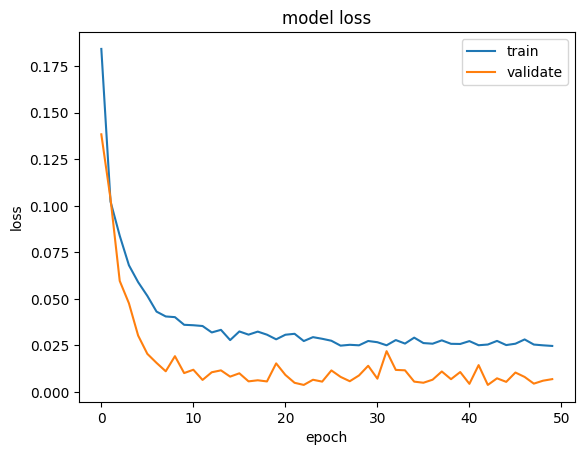

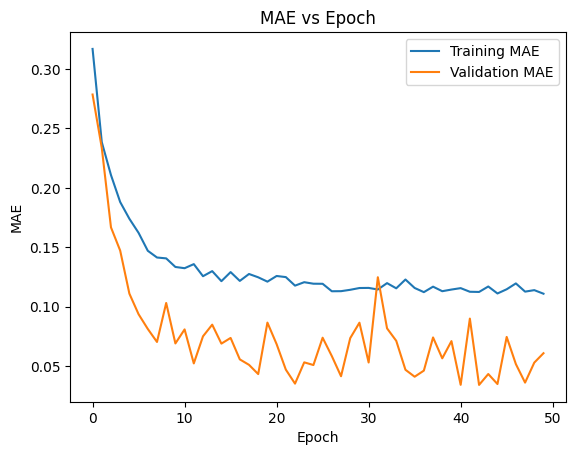

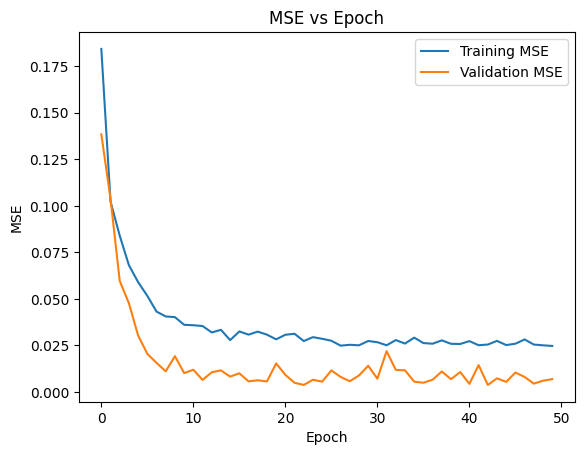

In [ ]:
# summarize history for loss
plt.plot(history.history['loss']) # plot the 'loss'
plt.plot(history.history['val_loss']) # plot the 'val_loss'
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# Plot training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE vs Epoch')
plt.show()

# Plot training and validation MSE
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs Epoch')
plt.show()


# Evaluation

20/20 [==============================] - 1s 26ms/step


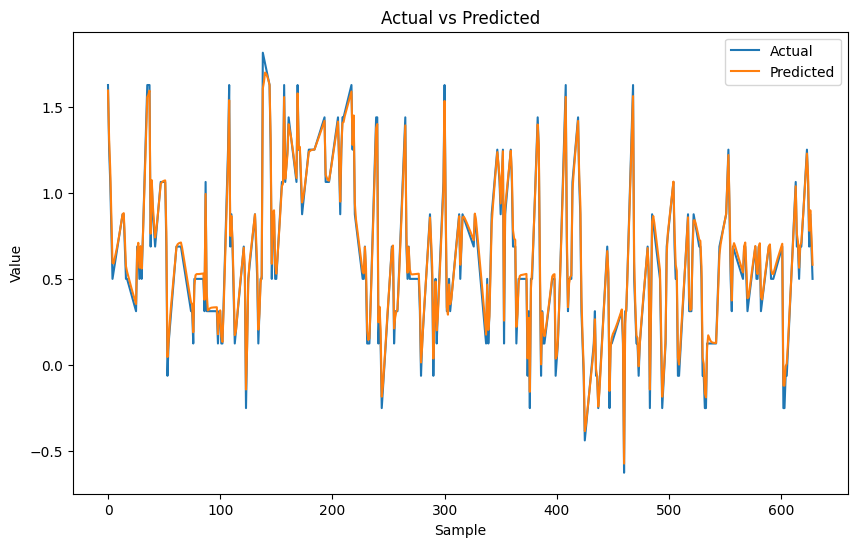

In [ ]:

# Make predictions on the test data
predictions = model.predict(input_test)

# Plot the actual test data and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(target_test, label='Actual')  # Plot the actual values
plt.plot(predictions, label='Predicted')  # Plot the predicted values
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
#plt.xlim(250,300)
plt.legend()
plt.show()

In [ ]:
print(predictions)
print('___________')
print(target_test)

In [ ]:
print("Input Test Shape:", input_test.shape)
print("Target Test Shape:", target_test.shape)

Input Test Shape: (629, 24, 1)
Target Test Shape: (629, 1)


In [ ]:
# Compare the predicted values to the actual target values
accuracy = model.evaluate(input_test, target_test)

# Print the evaluation metrics (e.g., loss and accuracy)
print("Loss:", accuracy[0])
print("Mean Absolute Error:", accuracy[1])
print("Mean Squared Error:", accuracy[2])

20/20 [==============================] - 0s 15ms/step - loss: 0.0018 - mae: 0.0328 - mse: 0.0018
Loss: 0.0017760300543159246
Mean Absolute Error: 0.03275290131568909
Mean Squared Error: 0.0017760300543159246


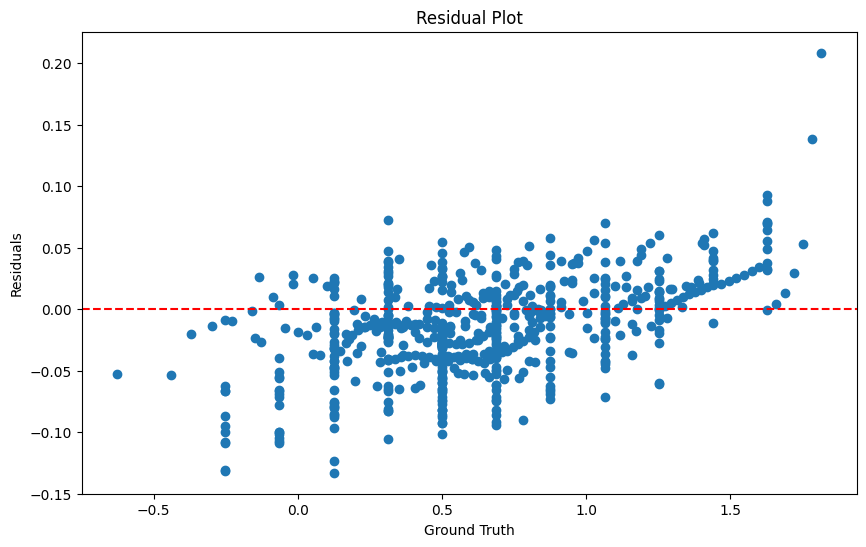

In [ ]:
residuals = target_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(target_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Ground Truth')
plt.ylabel('Residuals')
plt.show()